In [1]:
import tensorflow as tf
import numpy as np

### TensorFlow로 Softmax Classification 구현

y_data를 one-hot encoding으로 표현. 3가지 클래스가 있는 경우 그 선택할 클래스를 1로 표시하고 나머지는 0으로 표시.

In [2]:
x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5], 
         [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
# Using one-hot encoding at y_data.
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes], name='weight'))
b = tf.Variable(tf.random_normal([nb_classes], name='bias'))

아래의 hypothesis는 softmax function을 사용하여 계산하는 식이다.

In [3]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

softmax function이란 다음 그림과 같이 score를 0.0과 1.0사이의 값으로 변환하는 function이다.

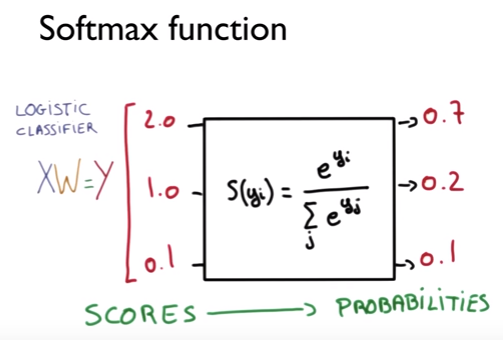

In [4]:
# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

tf.arg_max 함수는 a중 가장 큰 하나의 index를 출력해준다. 두번째 파라미터 1은 a중 하나를 출력하라는 의미이다.

마지막 testing 부분에서는 학습한대로 결과가 출력되는 것을 확인할 수 있다.

In [5]:
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
    # Testing & One-hot encoding
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print(a, sess.run(tf.arg_max(a, 1)))
    
    b = sess.run(hypothesis, feed_dict={X: [[1, 2, 1, 1]]})
    print(b, sess.run(tf.arg_max(b, 1)))
    
    c = sess.run(hypothesis, feed_dict={X: [[1, 7, 7, 7]]})
    print(c, sess.run(tf.arg_max(c, 1)))
    
    all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print(all, sess.run(tf.arg_max(all, 1)))

0 9.85341
200 0.570077
400 0.46637
600 0.388849
800 0.316829
1000 0.247585
1200 0.221131
1400 0.20144
1600 0.184866
1800 0.170728
2000 0.158531
[[  6.25861157e-03   9.93731081e-01   1.03582424e-05]] [1]
[[  3.80018741e-06   1.29144220e-03   9.98704791e-01]] [2]
[[  9.17386889e-01   8.26124698e-02   6.94483049e-07]] [0]
[[  6.25862041e-03   9.93731081e-01   1.03582524e-05]
 [  8.46941233e-01   1.37503460e-01   1.55553119e-02]
 [  1.65877303e-08   3.77730263e-04   9.99622226e-01]] [1 0 2]
